# Python 資料分析/機器學習常見Error

- 讀取檔案
- 資料視覺化
- 特徵處理:標準化
- 特徵處理:合併組別
- 特徵處理:label-encoding
- 切割訓練/驗證集
- 建立模型
- 模型預測

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## 讀取檔案

In [2]:
# Error 發生!

boston_house_train = pd.read_csv('train.csv')

FileNotFoundError: File b'train.csv' does not exist

In [2]:
# correct version






In [6]:
boston_house_train = pd.read_csv('train.csv')
boston_house_test = pd.read_csv('test.csv')

In [ ]:
train_y = boston_house_train['SalePrice']

boston_house = pd.concat([boston_house_train.drop('SalePrice', axis = 1), boston_house_test],
                         sort = False).reset_index(drop = True)

In [ ]:
boston_house.head()

---

## 資料視覺化

In [ ]:
boston_house_train.dtypes

/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/jovyan/.local/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

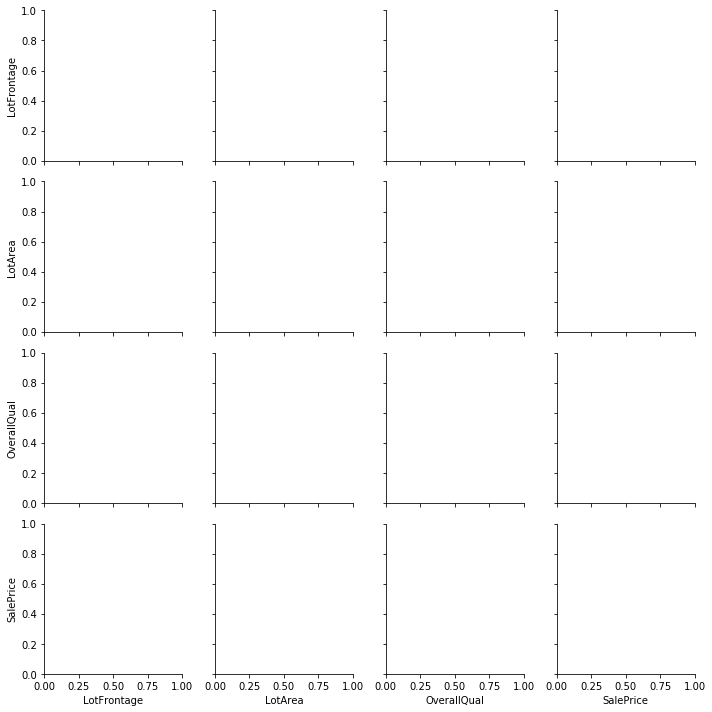

In [10]:
# Error 發生!

sns.pairplot(boston_house_train[['LotFrontage','LotArea','OverallQual','SalePrice']])

In [2]:
# correct version






---

## 特徵處理 - 標準化

In [12]:
# Error 發生! - Part I

normalize_data = boston_house.copy()

for col in normalize_data.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    normalize_data[col] = mms.fit_transform(normalize_data[col])

ValueError: Expected 2D array, got 1D array instead:
array=[1.000e+00 2.000e+00 3.000e+00 ... 2.917e+03 2.918e+03 2.919e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
# Error 發生! - Part II

normalize_data = boston_house.copy()

for col in normalize_data.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    normalize_data[col] = mms.fit_transform(normalize_data[[col]])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [2]:
# correct version






In [ ]:
normalize_data.head()

---

## 特徵處理 - 合併組別

#### MSZoning

In [ ]:
normalize_data['MSZoning'].value_counts()

In [18]:
# Error 發生!

if normalize_data[normalize_data['MSZoning']==0]:
    normalize_data['MSZoning'] = 'RL'

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
# correct version






In [ ]:
normalize_data['MSZoning'].value_counts()

#### LotShape

In [ ]:
normalize_data['LotShape'].value_counts()

In [16]:
# Warning 發生!

normalize_data['LotShape'][normalize_data['LotShape']=='IR3'] = 'IR2'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
normalize_data['LotShape'].value_counts()

---

## 特徵處理 - Label Encoding

In [21]:
# Error 發生! - Part I

label_encode_data = normalize_data.copy()

for col in label_encode_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    label_encode_data[col] = le.fit_transform(label_encode_data[col])

NameError: name 'LabelEncoder' is not defined

In [22]:
# Error 發生! - Part II

from sklearn.preprocessing import LabelEncoder

label_encode_data = normalize_data.copy()

for col in label_encode_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    label_encode_data[col] = le.fit_transform(label_encode_data[col])

TypeError: '<' not supported between instances of 'str' and 'float'

In [3]:
# correct version






In [ ]:
label_encode_data.head()

---

## 切割訓練集&驗證集

In [25]:
# Error 發生!

train_len = len(boston_house_train)

train_x = label_encode_data[:train_len,:]
test_x = label_encode_data[train_len:,:]

TypeError: unhashable type: 'slice'

In [3]:
# correct version






---

## Build Model

In [27]:
# Error 發生!

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

t_x, v_x, t_y, v_y = train_test_split(train_x, train_y, test_size = 0.2, shuffle = True, random_state = 2019)

model = RandomForestClassifier()
model.fit(t_x, t_y)

print('Score : {:.3f}'.format(model.score(v_x, v_y)))

pred_v = model.predict(v_x)
pred_test = model.predict(test_x)

raise BaseException('Are you sure it\'s a Classification task ?')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Score : 0.010


BaseException: Are you sure it's a Classification task ?

In [3]:
# correct version






In [33]:
# Error 發生!

plt.scatter(v_y, pred_v)
plt.xlabel('Observed Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

print('R2 score of validation set: {:.3f}'.format(r2_score(y_true = v_y, y_pred = pred_v)))
print('log-RMSE of validation set: {:.3f}'.format((mean_squared_error(y_true = np.log(v_y), y_pred = np.log(pred_v)))**0.5)


SyntaxError: unexpected EOF while parsing (<ipython-input-33-b57f775c9217>, line 7)

In [3]:
# correct version






### Make Submission

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission.head()

In [ ]:
submission['SalePrice'] = pred_test

submission.head()

In [32]:
submission.to_csv('submission_gogo.csv', index = False)